<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM , SimpleRNN, Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
print(X_train[11])
print('The lenght of the sentence:',len(X_train[11]))
print('Train data shape: ',X_train.shape)
print('Test data shape: ',X_test.shape)

[1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 1398, 21, 54, 13, 219, 12, 13, 1706, 15, 4, 20, 16, 329, 6, 176, 329, 74, 51, 13, 873, 4, 156, 71, 78, 4, 2, 322, 16, 31, 7, 4, 249, 4, 65, 16, 38, 379, 12, 100, 157, 18, 6, 910, 20, 549, 18, 4, 1496, 21, 14, 31, 9, 24, 6, 212, 12, 9, 6, 1322, 991, 7, 3002, 4, 425, 9, 73, 2218, 549, 18, 31, 155, 36, 100, 763, 379, 20, 103, 351, 2, 13, 202, 12, 2241, 5, 6, 320, 46, 7, 457]
The lenght of the sentence: 99
Train data shape:  (25000,)
Test data shape:  (25000,)


In [ ]:
max_review_length = 200
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test =pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 200)
[   0    0    0    0    0    0    0    0    0    0    0    1  194 1153
  194    2   78  228    5    6 1463 4369    2  134   26    4  715    8
  118 1634   14  394   20   13  119  954  189  102    5  207  110 3103
   21   14   69  188    8   30   23    7    4  249  126   93    4  114
    9 2300 1523    5  647    4  116    9   35    2    4  229    9  340
 1322    4  118    9    4  130 4901   19    4 1002    5   89   29  952
   46   37    4  455    9   45   43   38 1543 1905  398    4 1649   26
    2    5  163   11 3215    2    4 1153    9  194  775    7    2    2
  349 2637  148  605    2    2   15  123  125   68    2    2   15  349
  165 4362   98    5    4  228    9   43    2 1157   15  299  120    5
  120  174   11  220  175  136   50    9 4373  228    2    5    2  656
  245 2350    5    4    2  131  152  491   18    2   32    2 1212   14
    9    6  371   78   22  625   64 1382    9    8  168  145   23    4
 1690   15   16    4 1355    5   28    6   52  154  462   33   8

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               13300     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import keras
his = keras.callbacks.History()
call = [his]
model.fit(X_train, y_train, epochs=10,validation_data = (X_train, y_train), batch_size=264 , verbose= 2 , callbacks = call)

Epoch 1/10
95/95 - 33s - loss: 0.6836 - accuracy: 0.5466 - val_loss: 0.6473 - val_accuracy: 0.6727 - 33s/epoch - 346ms/step
Epoch 2/10
95/95 - 30s - loss: 0.4982 - accuracy: 0.7558 - val_loss: 0.4472 - val_accuracy: 0.8036 - 30s/epoch - 314ms/step
Epoch 3/10
95/95 - 30s - loss: 0.3719 - accuracy: 0.8412 - val_loss: 0.3303 - val_accuracy: 0.8661 - 30s/epoch - 321ms/step
Epoch 4/10
95/95 - 30s - loss: 0.3197 - accuracy: 0.8683 - val_loss: 0.2812 - val_accuracy: 0.8900 - 30s/epoch - 318ms/step
Epoch 5/10
95/95 - 30s - loss: 0.2910 - accuracy: 0.8825 - val_loss: 0.2840 - val_accuracy: 0.8844 - 30s/epoch - 319ms/step
Epoch 6/10
95/95 - 30s - loss: 0.2772 - accuracy: 0.8881 - val_loss: 0.2362 - val_accuracy: 0.9094 - 30s/epoch - 311ms/step
Epoch 7/10
95/95 - 26s - loss: 0.3015 - accuracy: 0.8745 - val_loss: 0.2389 - val_accuracy: 0.9080 - 26s/epoch - 275ms/step
Epoch 8/10
95/95 - 26s - loss: 0.2611 - accuracy: 0.8978 - val_loss: 0.2278 - val_accuracy: 0.9138 - 26s/epoch - 276ms/step
Epoch 9/

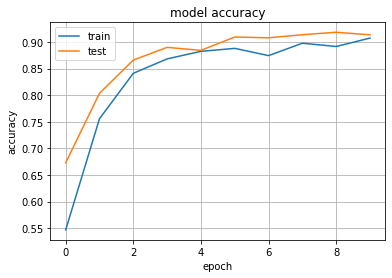

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'])  
plt.plot(his.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.grid()  
plt.legend(['train', 'test'])  
plt.show()

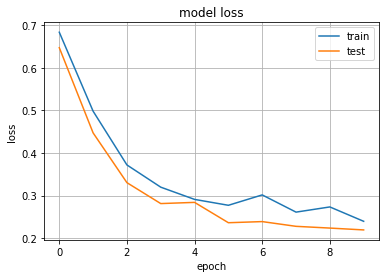

In [ ]:
import matplotlib.pyplot as plt
plt.plot(his.history['loss'])  
plt.plot(his.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.grid()  
plt.legend(['train', 'test'])  
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.06%


**Conclusion**

In this example it has been applied SimpleRNN


